# Figure 11.17 - CDD, SPI & SPEI

- SPI & SPEI data from Spinoni et al., 2019, processed by Sergio Vincente Serrano
- CDD from HadEX3

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplotutils as mpu
import numpy as np
import xarray as xr

import conf
from utils import plot
import hadex3

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.sans-serif'] = "Arial"

### Load SPI & SPEI data

multiply by 2 so we get it "per 10 years"

In [2]:
fN = "../data/spinoni_2019/results_spinoni_01.nc"

ds = xr.open_dataset(fN)
da = ds.Change

# only double the values 
sel = {"layer": slice(1, None, 2)}
da.loc[sel] = da.loc[sel] * 2

### Layers in the file

The file is organized in layers. For us layers 31 (severity SPEI 12) and 15 (severity SPI 12) are relevant. See "Details" for all layers.

<details>

- Layer 1: Differences between the 5-year average frequency of droughts in 1981-2015 and 1951-1980. SPI 3. Units: Drought events.
- Layer 2: Statistical significance of the difference in 5-year average frequency of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPI 3
---
- Layer 3: Magnitude of change in the frequency of droughts / 5 years. SPI 3. Units: Drought events /5 years
- Layer 4: Statistical significance of the magnitude of change in the frequency of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPI 3
---
- Layer 5: Differences between the 5-year average frequency of droughts in 1981-2015 and 1951-1980. SPI 12. Units: Drought events.
- Layer 6: Statistical significance of the difference in 5-year average frequency of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPI 12
---
- Layer 7: Magnitude of change in the frequency of droughts / 5 years. SPI 12. Units: Drought events /5 years
- Layer 8: Statistical significance of the magnitude of change in the frequency of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPI 12
---
- Layer 9: Differences between the 5-year average severity of droughts in 1981-2015 and 1951-1980. SPI 3. Units: SPI units.
- Layer 10: Statistical significance of the difference in 5-year average severity of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPI 3
---
- Layer 11: Magnitude of change in the severity of droughts / 5 years. SPI 3. Units: SPI units /5 years
- Layer 12: Statistical significance of the magnitude of change in the severity of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPI 3
---
- Layer 13: Differences between the 5-year average severity of droughts in 1981-2015 and 1951-1980. SPI 12. Units: SPI units.
- Layer 14: Statistical significance of the difference in 5-year average severity of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPI 12
---
- Layer 15: Magnitude of change in the severity of droughts / 5 years. SPI 12. Units: SPI units /5 years
- Layer 16: Statistical significance of the magnitude of change in the severity of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPI 12
---
- Layer 17: Differences between the 5-year average frequency of droughts in 1981-2015 and 1951-1980. SPEI 3. Units: Drought events.
- Layer 18: Statistical significance of the difference in 5-year average frequency of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPEI 3
---
- Layer 19: Magnitude of change in the frequency of droughts / 5 years. SPEI 3. Units: Drought events /5 years
- Layer 20: Statistical significance of the magnitude of change in the frequency of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPEI 3
---
- Layer 21: Differences between the 5-year average frequency of droughts in 1981-2015 and 1951-1980. SPEI 12. Units: Drought events.
- Layer 22: Statistical significance of the difference in 5-year average frequency of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPEI 12
---
- Layer 23: Magnitude of change in the frequency of droughts / 5 years. SPEI 12. Units: Drought events /5 years
- Layer 24: Statistical significance of the magnitude of change in the frequency of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPEI 12
---
- Layer 25: Differences between the 5-year average severity of droughts in 1981-2015 and 1951-1980. SPEI 3. Units: SPEI units.
- Layer 26: Statistical significance of the difference in 5-year average severity of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPEI 3
---
- Layer 27: Magnitude of change in the severity of droughts / 5 years. SPEI 3. Units: SPEI units /5 years
- Layer 28: Statistical significance of the magnitude of change in the severity of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPEI 3
---
- Layer 29: Differences between the 5-year average severity of droughts in 1981-2015 and 1951-1980. SPEI 12. Units: SPEI units.
- Layer 30: Statistical significance of the difference in 5-year average severity of droughts in 1981-2015 and 1951-1980. Wilcoxon test. Values = 1 are statistically significant. SPEI 12
---
- Layer 31: Magnitude of change in the severity of droughts / 5 years. SPEI 12. Units: SPEI units /5 years
- Layer 32: Statistical significance of the magnitude of change in the severity of droughts / 5 years. Mann-Kandall test removing autocorrelation. Values = 1 are statistically significant. SPEI 12
---
- Layer 33: Empty
    
    
</details>

## Load CDD (HadEx3)

In [3]:
CDD = hadex3.HadEx3.read_file("CDD")
CDD_theil = hadex3.theil_after_dunn(CDD, alpha=0.1, time=slice(1960, None))

end date removed 0.21 % valid gridpoints
minimum_valid removed 2.32 % valid gridpoints


## Shown layers

31 (severity SPEI 12) 15 (severity SPI 12) 

In [4]:
sev_SPEI_12 = da.sel(layer=31)
sev_SPEI_12_signif = da.sel(layer=32)

# not significant is NaN -> set to 0
# then mask out regions that are not assessed (ocean, Sahara...)
sev_SPEI_12_signif = sev_SPEI_12_signif.fillna(0).where(sev_SPEI_12.notnull())

sev_SPI_12 = da.sel(layer=15)
sev_SPI_12_signif = da.sel(layer=16)
sev_SPI_12_signif = sev_SPI_12_signif.fillna(0).where(sev_SPEI_12.notnull())

## Plot

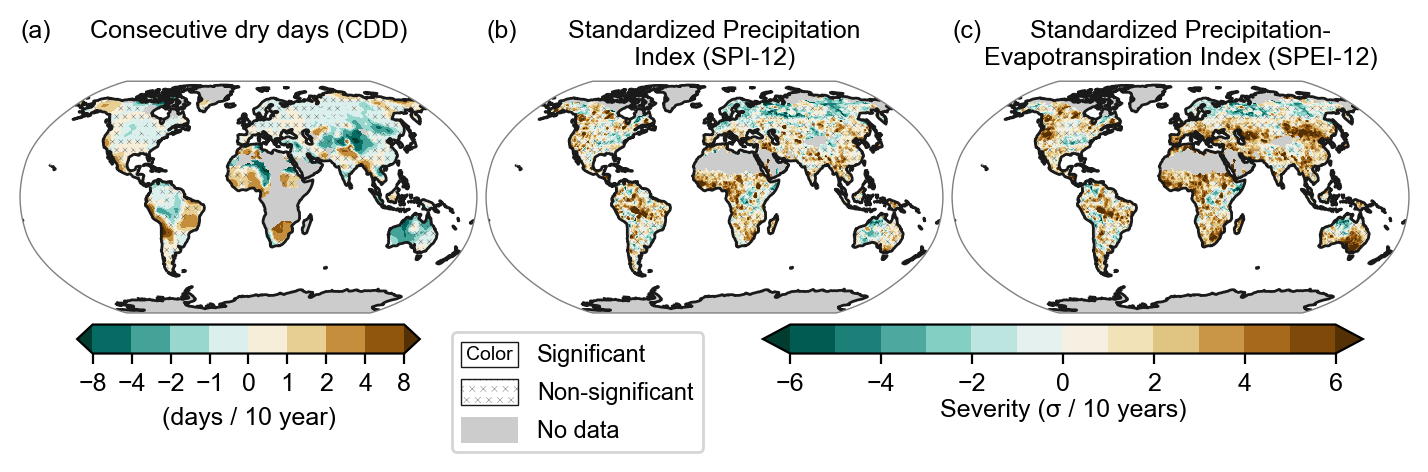

In [5]:
levels = np.arange(-6, 6.1, 1)

opt = dict(
    levels=levels, cmap="BrBG_r", add_land=True, mask_ocean=True, plotfunc="contourf"
)

# ====

f, axs = plot.map_subplots(1, 3)

# ====

ax = axs[0]


opt_cdd = dict(
    colorbar_kwargs=dict(
        pad=0.05,
        shrink=0.25,
        size=0.125,
    ),
    plotfunc="contourf",
)
levels_cdd = [-8, -4, -2, -1, 0, 1, 2, 4, 8]
cbar, legend_handle = hadex3.plot_theilslope(
    *CDD_theil, ax=ax, levels=levels_cdd, cmap="BrBG_r", **opt_cdd
)

ax.set_title("Consecutive dry days (CDD)\n", fontsize=9)
ax.set_title("(a)\n", fontsize=9, loc="left")
cbar.set_label("(days / 10 year)", size=9)

# ====

ax = axs[1]

h = plot.one_map_flat(sev_SPI_12, ax, **opt)

legend_handle_0 = plot.hatch_map(
    ax,
    sev_SPI_12_signif,
    hatch="c" * 4,
    label="Non-significant",
    invert=True,
    linewidth=0.1,
    color="0.1",
)


ax.set_title("Standardized Precipitation\nIndex (SPI-12)", fontsize=9)
ax.set_title("(b)\n", fontsize=9, loc="left")

# ====

ax = axs[2]

h = plot.one_map_flat(sev_SPEI_12, ax, **opt)

legend_handle_0 = plot.hatch_map(
    ax,
    sev_SPEI_12_signif,
    hatch="c" * 4,
    label="Non-significant",
    invert=True,
    linewidth=0.1,
    color="0.1",
)


ax.set_title(
    "Standardized Precipitation-\nEvapotranspiration Index (SPEI-12)", fontsize=9
)
ax.set_title("(c)\n", fontsize=9, loc="left")

# ====

cbar = mpu.colorbar(
    h,
    axs[1],
    axs[2],
    orientation="horizontal",
    size=0.125,
    shrink=0.35,
    pad=0.05,
    shift=0.3,
)

cbar.set_label("Severity (σ / 10 years)", labelpad=1, size=9)
cbar.ax.tick_params(labelsize=9)  # , length=0)


# ====

legend_handle_1 = mpl.patches.Patch(
    facecolor="0.8",
    lw=1,
    label="No data",
)

lh1 = plot.text_legend(ax, "Color", "Significant", size=7)

lh2 = mpl.patches.Patch(
    facecolor="none",
    ec="0.1",
    lw=0.5,
    hatch="ccc",
    label="Non-significant",
)


axs[1].legend(
    handles=[lh1, lh2, legend_handle_1],
    handlelength=2.4,
    handleheight=1.30,
    loc="lower center",
    bbox_to_anchor=(0.2, -0.6),
    fontsize=8.5,
    borderaxespad=0,
    frameon=True,
    handler_map={mpl.text.Text: plot.TextHandler()},
    ncol=1,
)


side = 0.01
f.subplots_adjust(wspace=0.02, left=side, right=1 - side, bottom=0.31, top=0.81)

mpu.set_map_layout(axs, width=18)

f.canvas.draw()

fN = conf.figure_filename("trends_SPI_SPEI_12_CDD", "Figure_11.17_CDD_SPI_SPEI")

plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".png", dpi=600, facecolor="w")